Dentro del mapa de riesgos de operación de la organización para la que usted trabaja, se
encuentra el riesgo de continuidad de negocio que conecta a las personas con la tecnología.
Usted trabaja para una aseguradora y el pago de siniestros asociados a las pólizas se
describe como una de las actividades de mayor control, por lo que se hace necesario medir
la posibilidad de pérdida monetaria que impacta la continuidad de negocio dada la
intervención de las personas, la automatización de los procesos y la cantidad de aplicaciones
tecnológicas utilizadas para tomar la decisión de pago del siniestro de una póliza. Usted
analizó la situación y quiso involucrar la cantidad de actividades automatizadas en un
proceso y la cantidad de aplicativos que intervienen en este, para definir si el pago del
siniestro será o no correcto. Para esto identificó lo siguiente

QUINTIL TAREAS AUTOMATIZADAS APLICATIVOS INVOLUCRADOS MEDIDA DEL ERROR DE PAGO

K1 20 3 $300.000

K2 25 5 $700.000

K3 50 8 $1.500.000

K4 60 10 $7.800.000

K5 80 15 $15.000.000

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import skfuzzy
from skfuzzy import control as ctrl
import warnings

In [73]:
warnings.filterwarnings('ignore')

# 1. Declarar universos de discurso

In [74]:
# Universo de las variables
# Tareas automatizadas
tareas = ctrl.Antecedent(np.arange(0, 81, 1), 'tareas')
# Aplicativos involucrados
aplicativos = ctrl.Antecedent(np.arange(0, 16, 1), 'aplicativos')
# Medida del riesgo de pago (%)
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

# 2. Fuzzificar las variables

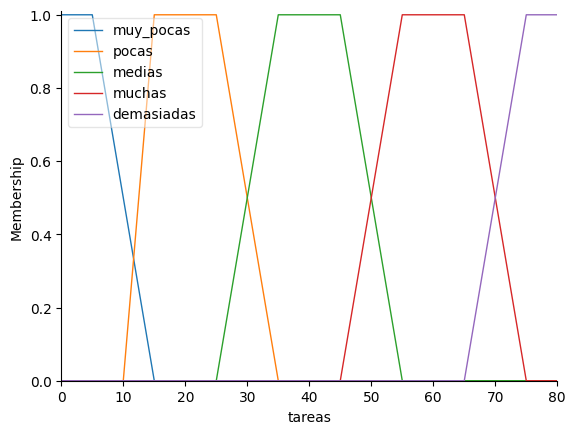

In [75]:
# Tareas automatizadas
tareas['muy_pocas'] = skfuzzy.trapmf(tareas.universe, [0, 0, 5, 15])
tareas['pocas'] = skfuzzy.trapmf(tareas.universe, [10, 15, 25, 35])
tareas['medias'] = skfuzzy.trapmf(tareas.universe, [25, 35, 45, 55])
tareas['muchas'] = skfuzzy.trapmf(tareas.universe, [45, 55, 65, 75])
tareas['demasiadas'] = skfuzzy.trapmf(tareas.universe, [65,75, 80, 80])

tareas.view()
plt.show()

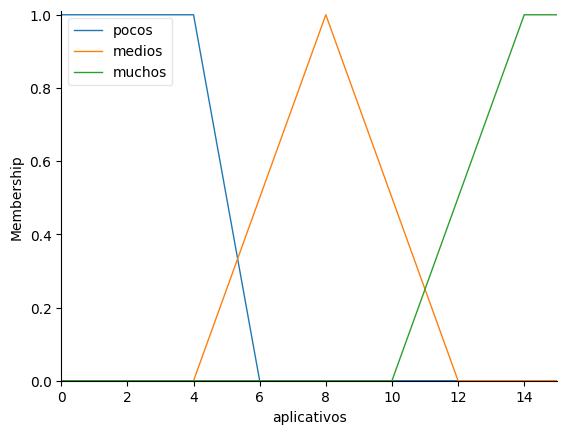

In [76]:
# aplicativos
aplicativos['pocos'] = skfuzzy.trapmf(aplicativos.universe, [0, 0, 4, 6])
aplicativos['medios'] = skfuzzy.trimf(aplicativos.universe, [4,8, 12])
aplicativos['muchos'] = skfuzzy.trapmf(aplicativos.universe, [10, 14, 15,15])


aplicativos.view()
plt.show()

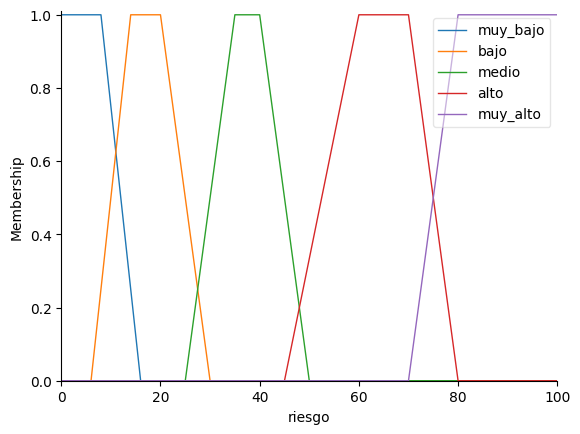

In [77]:
# riesgo
riesgo['muy_bajo'] = skfuzzy.trapmf(riesgo.universe, [0, 0, 8, 16])
riesgo['bajo'] = skfuzzy.trapmf(riesgo.universe, [6, 14, 20, 30])
riesgo['medio'] = skfuzzy.trapmf(riesgo.universe, [25, 35, 40, 50])
riesgo['alto'] = skfuzzy.trapmf(riesgo.universe, [45, 60, 70, 80])
riesgo['muy_alto'] = skfuzzy.trapmf(riesgo.universe, [70, 80, 100, 100])

riesgo.view()
plt.show()

# 3. Crear base de conocimiento

In [78]:
regla1 = ctrl.Rule(tareas['muy_pocas']&aplicativos['pocos'], riesgo['medio'])
regla2 = ctrl.Rule(tareas['muy_pocas']&aplicativos['medios'], riesgo['alto'])
regla3 = ctrl.Rule(tareas['muy_pocas']&aplicativos['muchos'], riesgo['muy_alto'])
regla4 = ctrl.Rule(tareas['pocas']&aplicativos['pocos'], riesgo['bajo'])
regla5 = ctrl.Rule(tareas['pocas']&aplicativos['medios'], riesgo['medio'])
regla6 = ctrl.Rule(tareas['pocas']&aplicativos['muchos'], riesgo['alto'])
regla7 = ctrl.Rule(tareas['medias']&aplicativos['pocos'], riesgo['bajo'])
regla8 = ctrl.Rule(tareas['medias']&aplicativos['medios'], riesgo['medio'])
regla9 = ctrl.Rule(tareas['medias']&aplicativos['muchos'], riesgo['alto'])
regla10 = ctrl.Rule(tareas['muchas']&aplicativos['pocos'], riesgo['muy_bajo'])
regla11 = ctrl.Rule(tareas['muchas']&aplicativos['medios'], riesgo['bajo'])
regla12 = ctrl.Rule(tareas['muchas']&aplicativos['muchos'], riesgo['medio'])
regla13 = ctrl.Rule(tareas['demasiadas']&aplicativos['pocos'], riesgo['muy_bajo'])
regla14 = ctrl.Rule(tareas['demasiadas']&aplicativos['medios'], riesgo['bajo'])
regla15 = ctrl.Rule(tareas['demasiadas']&aplicativos['muchos'], riesgo['medio'])


# Activar el motor de inf

In [79]:
controlRiesgo = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, 
                                   regla6, regla7, regla8, regla9, regla10,
                                   regla11, regla12, regla13, regla14, regla15])

# Escenario 1

Resultado: 37.49999999999999


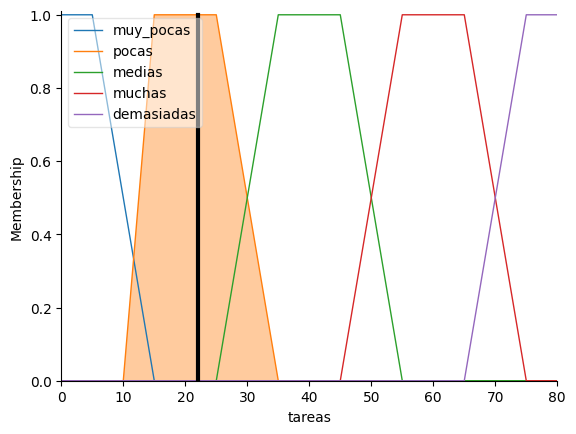

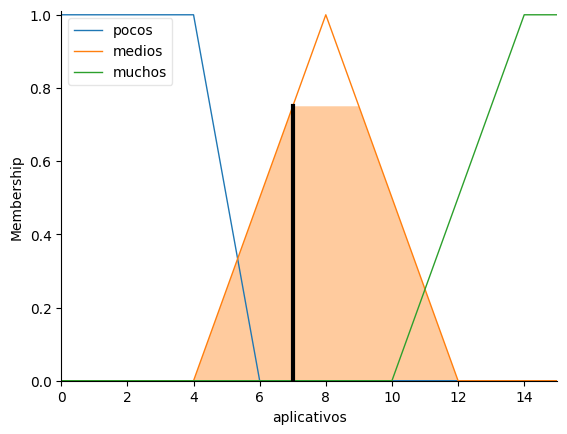

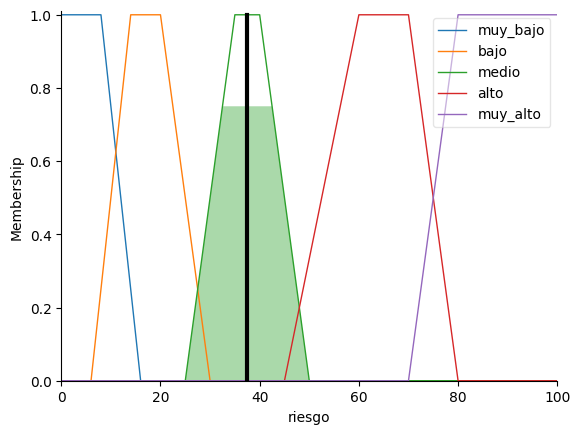

In [80]:
riesgoOperacion = ctrl.ControlSystemSimulation(controlRiesgo)
riesgoOperacion.input['tareas'] = 22
riesgoOperacion.input['aplicativos'] = 7


riesgoOperacion.compute()
print(f"Resultado: {riesgoOperacion.output['riesgo']}")

# Reglas activadas
tareas.view(sim = riesgoOperacion)
aplicativos.view(sim = riesgoOperacion)
riesgo.view(sim = riesgoOperacion)

# Escenario 2

Resultado: 63.07971014492754


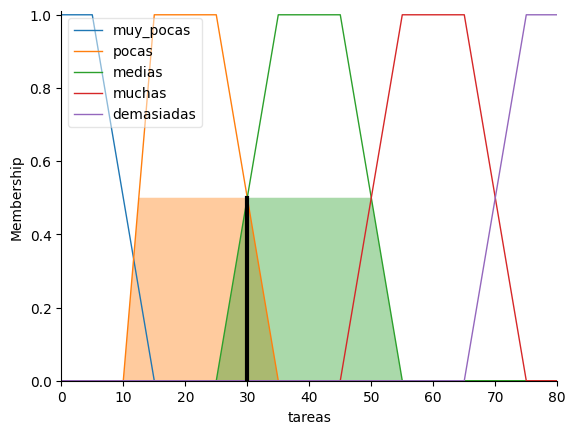

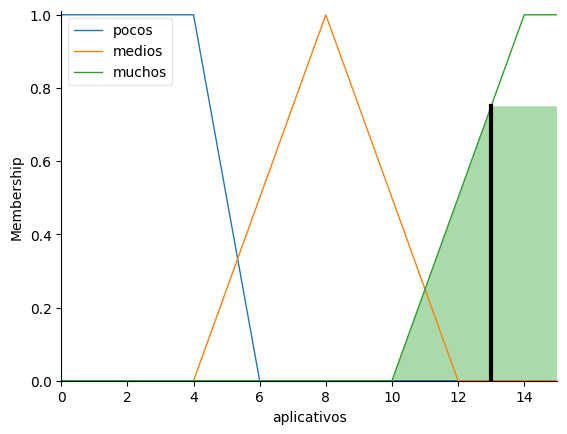

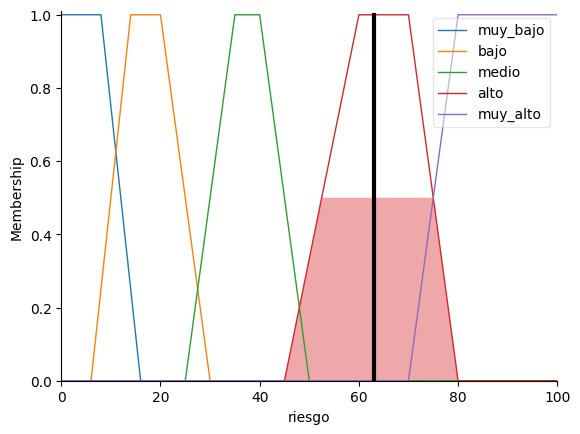

In [81]:
riesgoOperacion = ctrl.ControlSystemSimulation(controlRiesgo)
riesgoOperacion.input['tareas'] = 30
riesgoOperacion.input['aplicativos'] = 13


riesgoOperacion.compute()
print(f"Resultado: {riesgoOperacion.output['riesgo']}")

# Reglas activadas
tareas.view(sim = riesgoOperacion)
aplicativos.view(sim = riesgoOperacion)
riesgo.view(sim = riesgoOperacion)

# Escenario 3

Resultado: 17.599999999999998


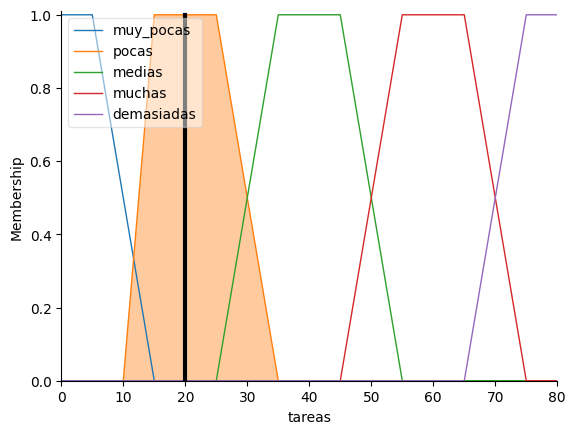

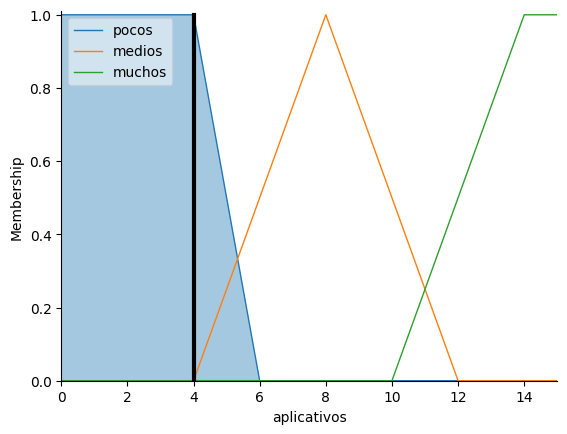

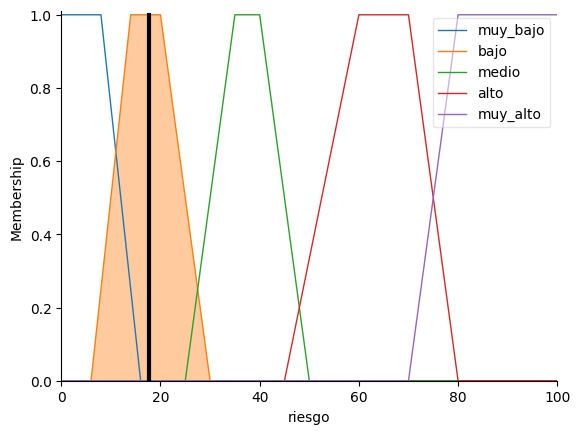

In [82]:
riesgoOperacion = ctrl.ControlSystemSimulation(controlRiesgo)
riesgoOperacion.input['tareas'] = 20
riesgoOperacion.input['aplicativos'] = 4


riesgoOperacion.compute()
print(f"Resultado: {riesgoOperacion.output['riesgo']}")

# Reglas activadas
tareas.view(sim = riesgoOperacion)
aplicativos.view(sim = riesgoOperacion)
riesgo.view(sim = riesgoOperacion)

# Escenario 4

Resultado: 42.867219313554386


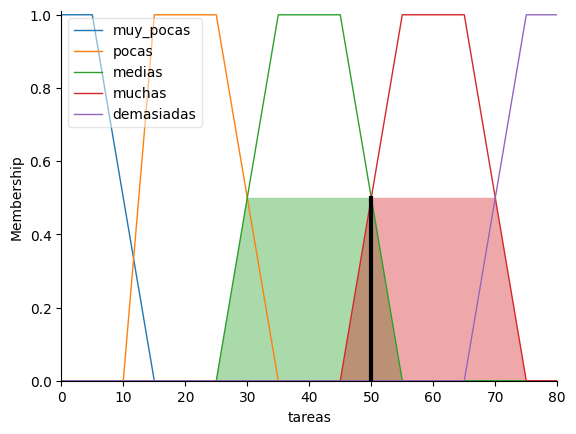

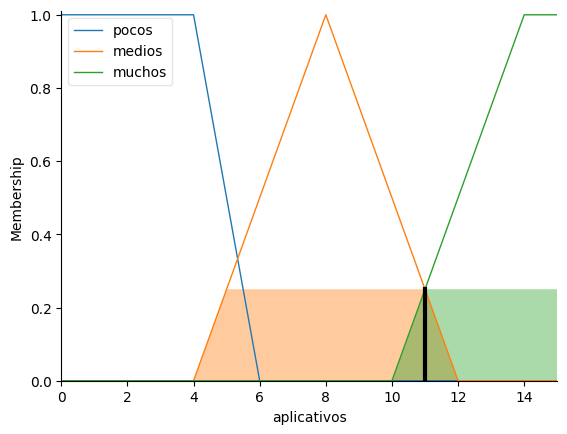

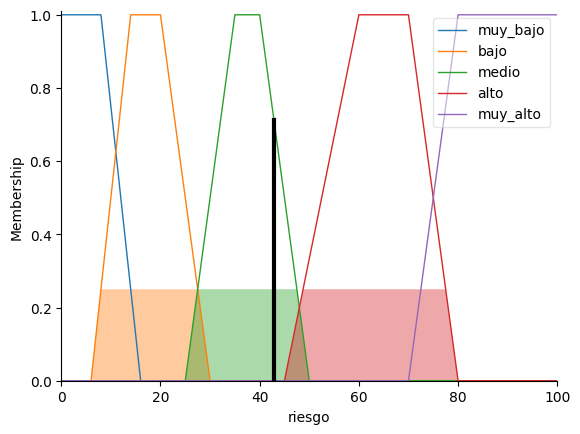

In [83]:
riesgoOperacion = ctrl.ControlSystemSimulation(controlRiesgo)
riesgoOperacion.input['tareas'] = 50
riesgoOperacion.input['aplicativos'] = 11


riesgoOperacion.compute()
print(f"Resultado: {riesgoOperacion.output['riesgo']}")

# Reglas activadas
tareas.view(sim = riesgoOperacion)
aplicativos.view(sim = riesgoOperacion)
riesgo.view(sim = riesgoOperacion)